# Tarea 6

**Envío del PR inicial:** Sábado, 3 de noviembre

**Aceptación del PR:** Viernes 9 de noviembre

**NOTA:** Esta tarea debe entregarse en equipo.

In [1]:
using TaylorSeries, Plots

In [2]:
include("Mapeos.jl")
using Mapeos

# 1

- ¿Cómo se generaliza la expresión anterior para el exponente de Lyapunov en mapeos de 1 variable, a mapeos de 2 variables?


- ¿Cómo se compara el exponente de Lyapunov $\lambda(x_0)$ con $\lambda( f(x_0) )$, para el mapeo $x\mapsto f(x)$?

# 2

Obtengan, para la familia de mapeos cuadrática $Q_c(x)$, el diagrama que muestra el exponente de Lyapunov en términos de $c$, para $c\in[-2,2]$.

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) para los valores de $c$ donde hay bifurcaciones?

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) cuando tenemos *ciclos superestables*, es decir, cuando $x=0$ es parte de un ciclo periódico?

In [157]:
pyplot()

Plots.PyPlotBackend()

In [3]:
function calcula_lyapunov(f::Function, x0::Float64, n::Int=1000)
    x = x0
    t = Taylor1(eltype(x0), 1)
    suma = 0.
    for _ in 1:n
        xi = f(x)
        der = f(t + xi).coeffs[2]
        suma += log(abs(der))
        x = xi
    end
    suma / n
end 

calcula_lyapunov (generic function with 2 methods)

In [4]:
Qc(x, c) = x^2 + c

Qc (generic function with 1 method)

In [11]:
rango_c = -2:1e-5:2
coefs_lyapunov = []
x0 = 0.
for c in rango_c
    ff = x -> Qc(x, c)
    push!(coefs_lyapunov, calcula_lyapunov(ff, x0))
end

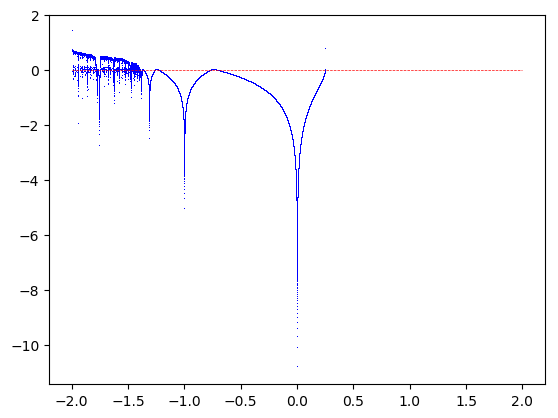

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000027E04828>

In [21]:
plot(rango_c, coefs_lyapunov, ms=0.1)

De la grafica anterior se ve para los valores de $c$ en los que hay una bifurcación, el exponente de lyapunov se hace 0, mientras que para los ciclos superestables el exponente se va a infinito.

# 3

Rehacer los cálculos de los exponentes de Feigenbaum,
\begin{eqnarray*}
f_n &=& \frac{C_n-C_{n+1}}{C_{n+1}-C_{n+2}},\\
a_n &=& \frac{d_n}{d_{n+1}},
\end{eqnarray*}

usando los valores $C_n$ donde se tienen ciclos superestables de periodo $2^n$. (Este ejercicio es muy parecido a los ejercicios 1 y 3 de la `Tarea4`.) 

Nota: Es importante dar un punto suficientemente bien aproximado a $C_n$ para que el método de Newton converja bien.

In [5]:
function Qcⁿ(x, args)
    c, n = args[1], args[2]
    @assert n >= 0 && isa(n,Int)
    n <= 1 && return Qc(x,c)
    for it = 1:n
        x = Qc(x,c)
    end
    return x
end

Qcⁿ (generic function with 1 method)

In [6]:
function roots_newton(f, x0)
    t = Taylor1(eltype(x0), 1)
    for ind = 1:30
       fT = f(x0+t)
       x0 = x0 - fT[0]/fT[1]
    end
    x0
end

roots_newton (generic function with 1 method)

De manera similar a la tarea pasada busquemos estas $C_n$ una por una.
Para esto primero necesitamos semillas aproximadas a estos puntos superestables, para ello usemos el hecho de que el punto superestable $x=0$ ha de formar parte de la orbita de periodo $2^n$.

In [193]:
rango_c = reverse(-1.5:1e-5:1)
mapeos = [Mapeo(x -> Qc(x, c), 0., 1000) for c in rango_c];

In [ ]:
atr_pts = [m.xnn[end] for ]

In [ ]:
function aproxima_Cn(Fλ, rango_c, n; n_iters=1000, x0=0.)
    for c in rango_c
        F = x -> Fλ(x, c)
        m = Mapeo(F, x0, n_iters)
        atr = m.xnn[end]
        t = Taylor1(eltype(x0), 1)
        der = F(atr + t)[2]
        

In [180]:
qq = (x, c) -> Qcⁿ(x, (c, 1))

(::#597) (generic function with 1 method)

In [181]:
q = x -> qq(x, .5)

(::#599) (generic function with 1 method)

In [182]:
t = Taylor1(1)

 1.0 t + 𝒪(t²)

In [186]:
q(0 + t)[1]

0.0

In [190]:
rango_c = reverse(-1:1e-3:1)
cs = []
for c in rango_c
    q = x -> qq(x, c)
    t = Taylor1(1)
    qT = q(t)
    der = qT[1]
    if abs(der) < 1e-4
        push!(cs, c)
    end
end

In [191]:
cs

2001-element Array{Any,1}:
  1.0  
  0.999
  0.998
  0.997
  0.996
  0.995
  0.994
  0.993
  0.992
  0.991
  0.99 
  0.989
  0.988
  ⋮    
 -0.989
 -0.99 
 -0.991
 -0.992
 -0.993
 -0.994
 -0.995
 -0.996
 -0.997
 -0.998
 -0.999
 -1.0  

# 4

Comparar gráficamente los mapeos $Q_{c}(x)$ y $Q_{c^\prime}^2(x)$ para $c=1/4, 0, -3/4, -1, -2, -2.2$ y $c^\prime=-3/4,-1,-5/4,-1.3, -1.546\dots, -1.65$. 


In [47]:
?Mapeo

search: Mapeo Mapeos grafica_mapeo grafica_mapeo! mapreduce mapreducedim



No documentation found.

**Summary:**

```
struct Mapeos.Mapeo <: Any
```

**Fields:**

```
F   :: Function
x₀  :: Real
n   :: Int64
xnn :: Array{Float64,1}
x   :: Array{Float64,1}
y   :: Array{Float64,1}
div :: Bool
```


In [39]:
q1 = (x, c) -> Qcⁿ(x, (c, 1))
q2 = (x, c) -> Qcⁿ(x, (c, 2)) 

(::#75) (generic function with 1 method)

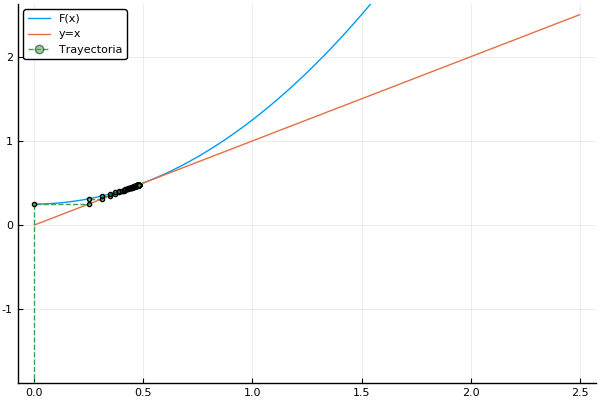

In [158]:
m = Mapeo(x -> q1(x, 1/4), 0.0, 1000)
grafica_mapeo(m, 1:100)

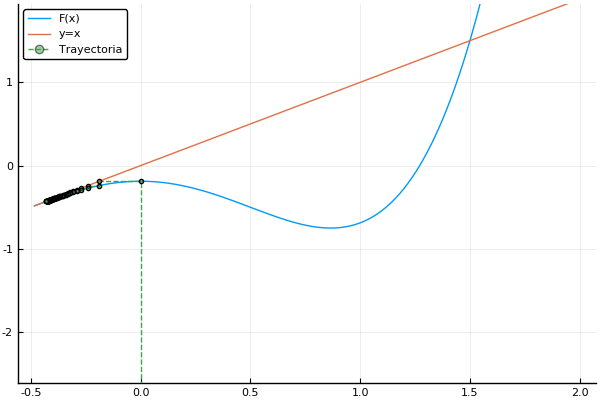

In [159]:
m = Mapeo(x -> q2(x, -3/4), 0., 1000)
grafica_mapeo(m, 1:100)

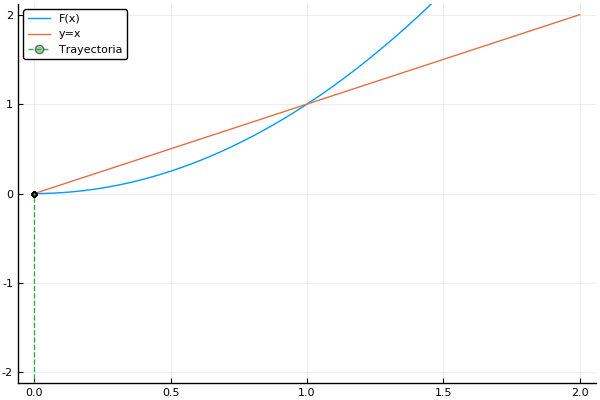

In [160]:
m = Mapeo(x -> q1(x, 0), 0., 1000)
grafica_mapeo(m, 1:100)

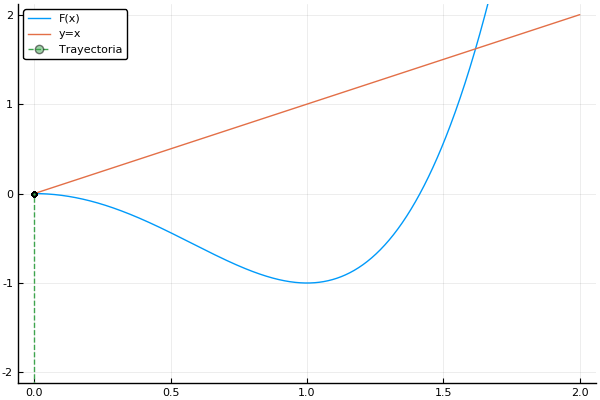

In [161]:
m = Mapeo(x -> q2(x, -1), 0., 1000)
grafica_mapeo(m, 1:100)

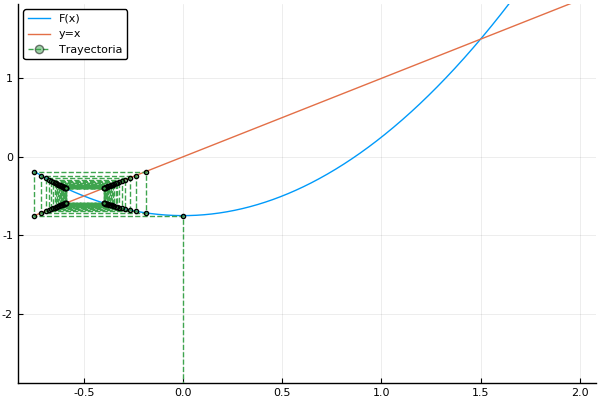

In [162]:
m = Mapeo(x -> q1(x, -3/4), 0.0, 1000)
grafica_mapeo(m, 1:100)

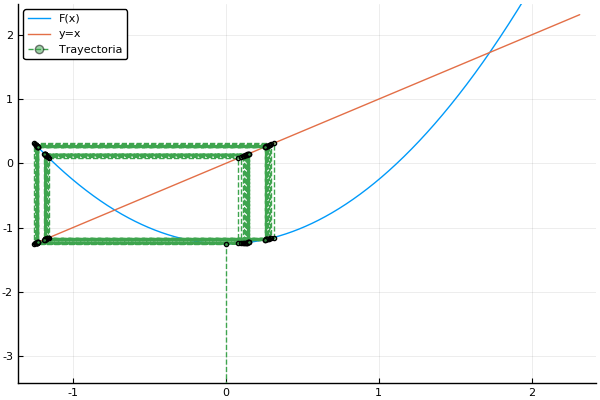

In [163]:
m = Mapeo(x -> q1(x, -5/4), 0.0, 1000)
grafica_mapeo(m, 1:100)

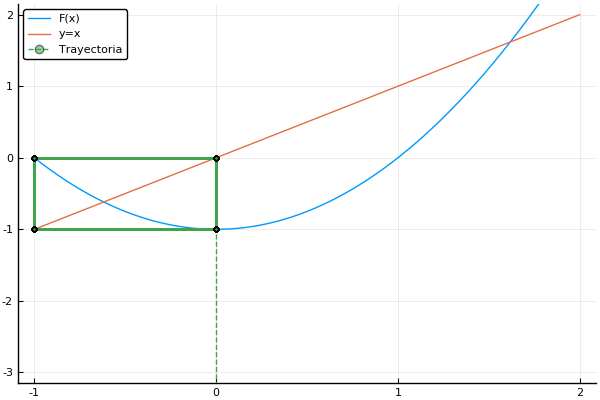

In [164]:
m = Mapeo(x -> q1(x, -1), 0.0, 1000)
grafica_mapeo(m, 1:100)

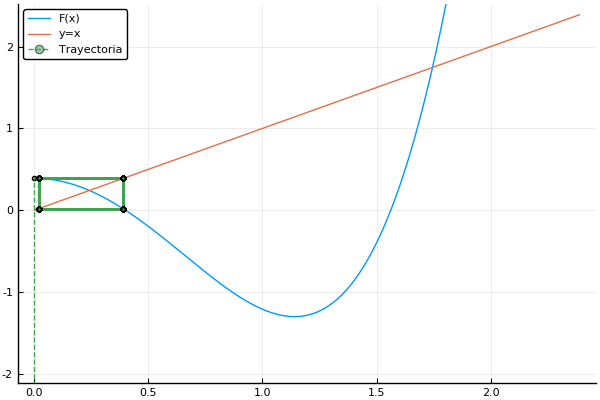

In [165]:
m = Mapeo(x -> q2(x, -1.3), 0.0, 1000)
grafica_mapeo(m, 1:100)

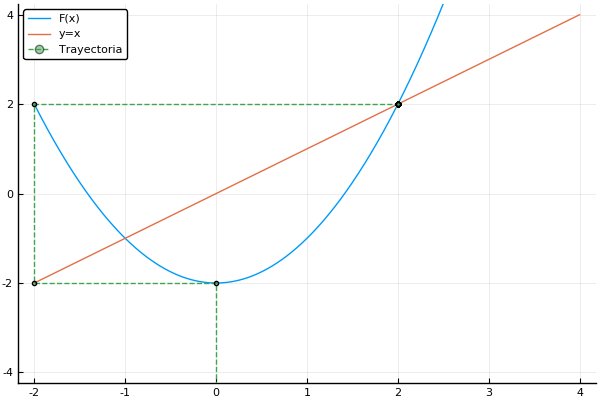

In [166]:
m = Mapeo(x -> q1(x, -2), 0.0, 1000)
grafica_mapeo(m, 1:100)

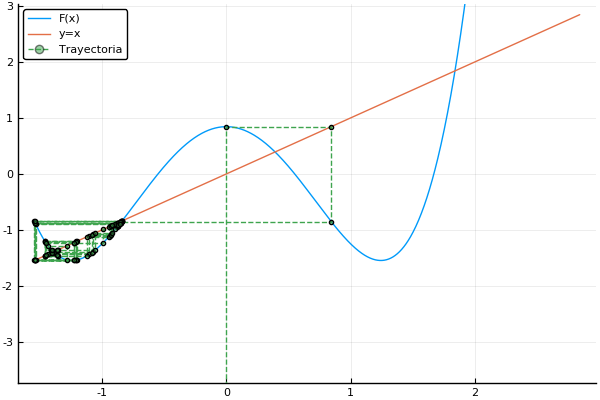

In [167]:
m = Mapeo(x -> q2(x, -1.546), 0.0, 1000)
grafica_mapeo(m, 1:100)

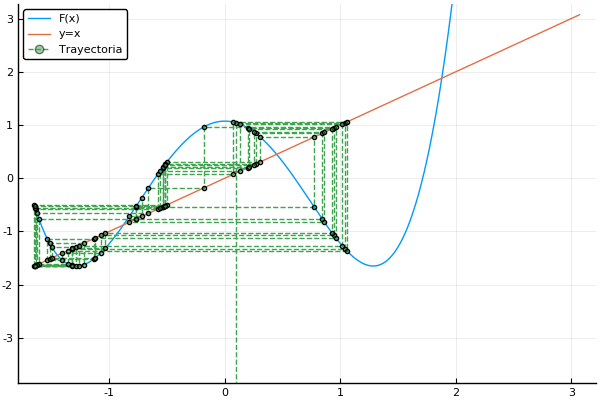

In [169]:
m = Mapeo(x -> q2(x, -1.65), 0.1, 1000)
grafica_mapeo(m, 1:100)

# 5

Estudiar la dinámica para $c=-2.2$

- ¿Cómo se caracteriza el valor al que tiende *casi* cualquier condición inicial en el
intervalo $I=[-p_+,p_+]$ (donde $p_+$ es el valor positivo tal que $Q_c(p_+)=p_+$), después de muchos iterados? (El intervalo $I$ es donde "toda la dinámica interesante ocurre".)

- Caractericen los subconjuntos de $I$ tales que, después de $n=1,2,3,\dots$ iterados de $Q_c(x)$, su intersección con $I$ es vacía.

- Caracterizen al complemento del conjunto de los casos anteriores, es decir, cuando los iterados de la condición inicial **no** llegan a donde *casi* cualquier condición inicial termina. ¿Cómo se conoce a este conjunto?

In [170]:
p₊(c) = (1 + sqrt(1 - 4c)) / 2

p₊ (generic function with 1 method)

In [171]:
pm = p₊(-2.2)

2.0652475842498528

In [172]:
rango_x = -pm:1e-4:pm

-2.0652475842498528:0.0001:2.0651524157501475

In [173]:
Δ = abs(pm)
n_iters = 100
mapeos = [Mapeo(x -> q1(x, -2.2), xx, n_iters) for xx in rango_x];
xs = []
ns = []
for m in mapeos
    for i in 1:n_iters
        if abs(m.xnn[i]) > Δ
            push!(ns, i-1)
            push!(xs, m.x₀)
            break
        end
    end
end

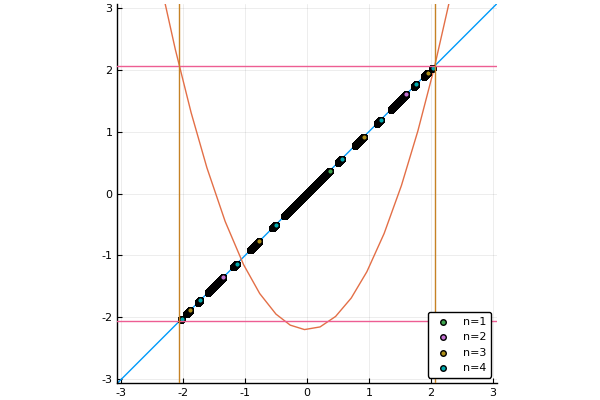

In [179]:
δ = 1
plot(x -> x, label="", ratio=:equal, legend=:bottomright)
plot!(x -> q1(x, -2.2), label="")
scatter!(xs[ns .== 1], xs[ns .== 1], label="n=1")
scatter!(xs[ns .== 2], xs[ns .== 2], label="n=2")
scatter!(xs[ns .== 3], xs[ns .== 3], label="n=3")
scatter!(xs[ns .== 4], xs[ns .== 4], label="n=4")
hline!([pm, -pm], label="")
vline!([pm, -pm], label="")
xlims!(-pm-δ, pm+δ)
ylims!(-pm-δ, pm+δ)

# 6

- Usando el análisis gráfico para un valor de $c$ *ligeramente* anterior al punto donde se observa la ventana de periodo 3 para la familia $Q_c(x)$, y uno en la ventana de periodo 3, concluyan el tipo de bifurcación que se observa.

- Comparen la dinámica para ambos valores de $c$ del inciso anterior. ¿Cómo es el exponente de Lyapunov en cada caso?

- Encuentren el valor de $c$ donde se da el ciclo superestable de periodo 3. (Nuevamente, usen el método de Newton con una buena semilla inicial para $c$.) Demuestren que para este valor de $c$ el mapeo $Q_c^3(x)$ tiene *ocho* puntos fijos, donde dos de ellos son puntos fijos de $Q_c(x)$, y los otros 6 forman dos secuencias periódicas, de periodo 3 en $Q_c(x)$, una de ellas estable y la otra inestable.

(Los siguientes incisos usan el valor de $c$ encontrado en el inciso anterior.)

- Denotando al ciclo inestable de periodo 3 como $\alpha\mapsto \beta\mapsto\gamma$, con $\gamma<\beta<\alpha$, uno puede asociar a cada uno de estos valores un valor $\hat\alpha, \hat\beta, \hat\gamma$, tales que $Q_c^3(\hat\alpha)=\alpha$, $Q_c^3(\hat\beta)=\beta$, $Q_c^3(\hat\gamma)=\gamma$. ¿Qué podemos concluir de un punto que cae en cualquiera de los intervalos $[\alpha,\hat\alpha]$, $[\beta,\hat\beta]$ y $[\hat\gamma,\gamma]$, en términos de los iterados sucesivos?

- Definiendo los intervalos $I_0=[\hat\beta, \alpha]$, $I_1=[\gamma,\beta]$, mostrar que bajo la acción de $Q_c(x)$ se cumple: (i) $Q_c(I_0) \supset I_1$, y (ii) $Q_c(I_1) \supset I_0\cup I_1$. ¿Qué propiedad *importante* de $Q_c(x)$ se utiliza aquí?

(Los intervalos $I_0$ e $I_1$, y estas propiedades, son básicos en la demostración del teorema "periodo tres implica caos".)